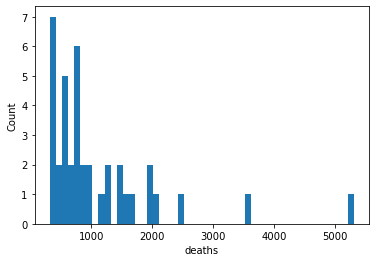

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import random
import statsmodels.api as sm

file='us-counties-2022.csv'
dat=pd.read_csv(file, header=0)
# print(dat)


plt.figure(1)
deaths=np.array(dat['deaths'])
plt.hist(deaths, bins=50);
plt.xlabel("deaths");
plt.ylabel("Count");


# plt.figure(2)
# plt.hist(t, bins = 100);
# plt.xlabel("t statistic");
# plt.ylabel("count");

cases=np.array(dat['cases'])
Mort=deaths/cases*100
# print(Mort)
# print(cases)
# print(deaths)

y intercept =
0.02021959856755875
The slope =
0.031430117646494074
y intercept =
0.07987000370913327
The slope =
0.12483134072628367
[ 3.64151865 -0.04219993]


C:\Users\ckoscho.PROCESSCOMBUST\AppData\Local\Temp\ipykernel_59032\3516285196.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Covid['MaleGroup'].loc[Covid['Percent Males']<49]=0
C:\Users\ckoscho.PROCESSCOMBUST\AppData\Local\Temp\ipykernel_59032\3516285196.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Covid['MaleGroup'].loc[Covid['Percent Males']>=49]=1
C:\Users\ckoscho.PROCESSCOMBUST\AppData\Local\Temp\ipykernel_59032\3516285196.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

IndexError: invalid index to scalar variable.

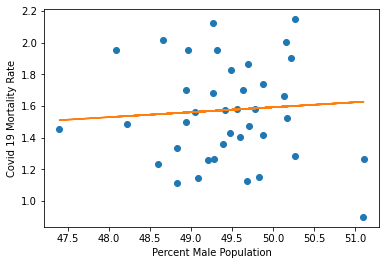

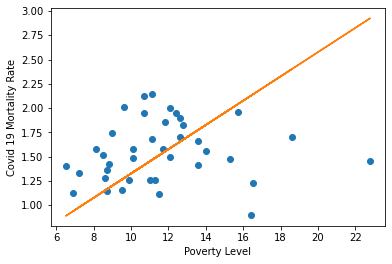

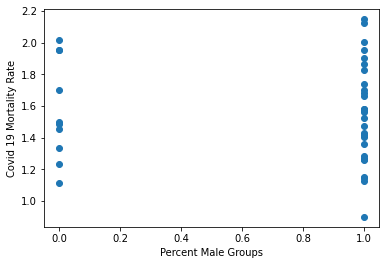

In [89]:
file='Poverty Pennsylvania.csv'
dat=pd.read_csv(file, header=0)
# print(dat)
shape=dat.shape[1]
# print(shape)
numcounties = int((shape-1)/6)
# print(numcounties)

pop=np.zeros(numcounties)
male=np.zeros(numcounties)
pov=np.zeros(numcounties)
counties=list(np.zeros(numcounties))
# print(pov)


# Extract the total population of both males and females within the 39 counties of Pennsylvania that are considered in poverty.
# Extract male populaion considered poverty level.
# Extract population percentage considered to be in poverty for each of 39 counties listed in Pennsylvania.
# Extract each column header (county name)

for i in range(numcounties):
#     print(i)
    pop[i]=np.array(dat.iloc[0][1+6*i].replace(',',''))
    
    male[i]=np.array(dat.iloc[2][1+6*i].replace(',',''))
   
    pov[i]=np.array(dat.iloc[0][5+6*i].replace(',','').replace('%',''))
    
    counties[i]=(dat.columns[1+6*i].split(' ')[0])
    
Percentmale=(male/pop*100)
# print(Percentmale)
# print(Mort)

# Plot Percent male vs Covid mortality rate

plt.figure(1)
plt.plot(Percentmale, Mort, 'o')
plt.xlabel("Percent Male Population");
plt.ylabel("Covid 19 Mortality Rate");

# Regression of percent male vs mortality rate.
x=sm.add_constant(Mort)
model=sm.OLS(x, Percentmale).fit()
# print(model.summary())
# print(model.params)


parameters=model.params[0]
intc=parameters[0]
slope=parameters[1]
print('y intercept =')
print(intc)
print('The slope =')
print(slope)
plt.plot(Percentmale,slope*Percentmale+intc)


# Plot Poverty level vs covid mortality rate
plt.figure(2)
plt.plot(pov, Mort, 'o')
plt.xlabel("Poverty Level");
plt.ylabel("Covid 19 Mortality Rate");

# Regression of poverty level vs mortality rate.
x=sm.add_constant(Mort)
model=sm.OLS(x, pov).fit()
# print(model.summary())
# print(model.params)


parameters=model.params[0]
intc=parameters[0]
slope=parameters[1]
print('y intercept =')
print(intc)
print('The slope =')
print(slope)
plt.plot(pov,slope*pov+intc)

# Plot discreet for group 1 less than 10% poverty level and group 2 greater than 10% poverty level.

Covid=pd.DataFrame([pov, Percentmale, Mort], ['Poverty level','Percent Males','Covid Mortality Rate'], counties)
Covid=Covid.transpose()
Covid['povGroup'] =''
# print(Covid)
Covid['MaleGroup'] =''
# print(Covid)

Covid['MaleGroup'].loc[Covid['Percent Males']<49]=0
Covid['MaleGroup'].loc[Covid['Percent Males']>=49]=1
Covid['povGroup'].loc[Covid['Poverty level']<10]=0
Covid['povGroup'].loc[Covid['Poverty level']>=10]=1
# print(Covid)

# Plot discreet for group 1 less than 49% male and group 2 greater than 49% percent male.
plt.figure(3)
plt.plot(Covid['MaleGroup'],Covid['Covid Mortality Rate'],'o')
plt.xlabel("Percent Male Groups");
plt.ylabel("Covid 19 Mortality Rate");
x=sm.add_constant(np.array(Covid['Percent Males']))
model=sm.OLS(np.array(Covid['Covid Mortality Rate']), x).fit()
# print(model.summary())
print(model.params)

parameters=model.params[0]
intc=parameters[0]
slope=parameters[1]
print('y intercept =')
print(intc)
print('The slope =')
print(slope)
plt.plot(Covid['Percent Males'], slope*Covid['Percent Males']+intc)


#Plot groups of above 49% male and below 10% poverty level.

#Regression of above 49% male and below 10% poverty level.

# print(pov)
# print(male)
# print(pop)
# print(counties)
# print(female)


         
# X = np.c_[np.ones(32),cyl,wt]
# from numpy.linalg import inv
# tmp = inv(np.matmul(np.transpose(X),X))
# temp=np.matmul(tmp,np.transpose(X))
# INTERCEPT, SLOPE, SLOPE2 = np.matmul(temp,mpg)
# print(INTERCEPT, SLOPE, SLOPE2)

# model=sm.OLS(mpg,X).fit()
# print(model.summary())
# # INTERCEPT, SLOPE, SLOPE2 = tmp @ np.transpose(X) @ mpg

# print(stats.ttest_1samp(pop,0))
# print(stats.ttest_1samp(pov,0))
# print(stats.ttest_ind(pop,pov))

# plt.figure(1)
# plt.hist(pov, bins=50);
# plt.xlabel("Percent Below Poverty Level %");
# plt.ylabel("Count");


In [ ]:
# file='Poverty Allegheny County.csv'
# dat=pd.read_csv(file, header=0)
# # print(dat)

# male=np.array(dat.iloc[12][1])
# female=np.array(dat.iloc[13][1])
# print(male)
# print(female)

# male=(male/(male+female)*100)
# female=(female/(male+female)*100)
# print(male)
# print(female)